In [41]:
from typing import List
import random


from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from chinese_checkers.reinforcement.experience import Experience, ExperienceMetadata, ExperienceCatalog
from chinese_checkers.reinforcement.dql import DQLAgent, DqlModelValidation
from chinese_checkers.simulation import SimulationCatalog, SimulationMetadata, SimulationData

In [43]:
def plot_reward_distributions(win_rewards: List[float], loss_rewards: List[float], title: str) -> None:
    """
    Plots overlayed reward distributions for winning and losing games, displaying mean and standard deviation.

    Args:
        win_rewards (List[float]): Rewards from winning games.
        loss_rewards (List[float]): Rewards from losing games.
    """
    # Calculate metrics
    win_mean = np.mean(win_rewards)
    win_std = np.std(win_rewards)
    loss_mean = np.mean(loss_rewards)
    loss_std = np.std(loss_rewards)

    # Print metrics
    print(f"Winning Player - Mean Reward: {win_mean:.2f}, Standard Deviation: {win_std:.2f}")
    print(f"Losing Player - Mean Reward: {loss_mean:.2f}, Standard Deviation: {loss_std:.2f}")

    # Plot overlayed normalized reward distributions with legend
    plt.figure(figsize=(10, 6))
    plt.hist(win_rewards, bins=60, alpha=0.6, color='blue', edgecolor='black', density=True,
             label=f"Winning Game: Rewards\nMean = {win_mean:.2f}, Std = {win_std:.2f}")
    plt.hist(loss_rewards, bins=60, alpha=0.6, color='green', edgecolor='black', density=True,
             label=f"Losing Game: Rewards\nMean = {loss_mean:.2f}, Std = {loss_std:.2f}")

    plt.title(f"Overlayed {title} Distributions for Winning and Losing Games")
    plt.xlabel("Reward")
    plt.ylabel("Density")
    plt.legend(loc="upper right")
    plt.show()

In [2]:
# import logging
# logging.basicConfig(level=logging.DEBUG)

In [3]:
sim_catalog = SimulationCatalog()
sim_metadata: List[SimulationMetadata] = sim_catalog.list_datasets()
sim_metadata

[SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='0', name='bootstrap-simulation', version='v0.0.1'),
 SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='3', name='bootstrap-simulation', version='v0.0.1'),
 SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='0', name='bad-player-3-bootstrap-simulation', version='v0.0.1'),
 SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='3', name='bad-player-3-bootstrap-simulation', version='v0.0.1'),
 SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='None', name='bad-player-3-bootstrap-simulation', version='v0.0.1'),
 SimulationMetadata(player_count=2, board_size=4, max_game_length=150, winning_player='0', name='bootstrap-simulation', version='v0.0.1'),
 SimulationMetadata(player_count=2, board_size=4, max_game_length=150, winning_player='3', name='bootstrap-simulation',

In [4]:
winning_players = ["0", "3"]
player_count = 2

simulations: List[SimulationData] = [
    dataset
    for metadata in sim_metadata
    if metadata.winning_player in winning_players
        and metadata.player_count == player_count
    for dataset in sim_catalog.load_dataset(metadata)
]
print(f"Found {len(simulations)} datasets for winning_players: {winning_players} and player_count: {player_count}.")

Found 7078 datasets for winning_players: ['0', '3'] and player_count: 2.


In [5]:
exp_catalog = ExperienceCatalog()
exp_catalog.list_datasets()

[ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='0', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.1', current_player='3'),
 ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='3', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.1', current_player='0'),
 ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='3', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.1', current_player='3'),
 ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='0', name='bad-player-3-bootstrap-simulation', version='v0.0.1', generator_name='v0.0.1', current_player='0'),
 ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='0', name='bad-player-3-bootstrap-simulation', version='v0.0.1', generator_name='v0.0.1', current_player='3'),
 ExperienceMetadata

In [32]:
random.shuffle(simulations)
with tqdm(simulations, desc="Generating experiences") as pbar:
    for simulation in pbar:
        experiences = Experience.generate_experiences_from_simulation(
            simulation,
            generator_name="v0.0.2"
        )
        exp_catalog.add_record_list(experiences)
        pbar.set_description(f"Generating experiences (Last generated: {len(experiences)} experiences)")


Generating experiences (Last generated: 292 experiences):   1%|          | 41/7078 [05:00<14:20:21,  7.34s/it]


KeyboardInterrupt: 

In [33]:
exp_metadata: List[ExperienceMetadata] = exp_catalog.list_datasets()
for metadata in exp_metadata:
    if metadata.generator_name == "v0.0.2":
        print(metadata)
        # exp_catalog.delete_dataset(metadata)

ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='0', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.2', current_player='0')
ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='0', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.2', current_player='3')
ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='3', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.2', current_player='0')
ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='3', name='bootstrap-simulation', version='v0.0.1', generator_name='v0.0.2', current_player='3')
ExperienceMetadata(player_count='2', board_size='4', max_game_length='1000', winning_player='0', name='bad-player-3-bootstrap-simulation', version='v0.0.1', generator_name='v0.0.2', current_player='0')
ExperienceMetadata(player_count='2', board

In [34]:
experiences: List[Experience] = [
    dataset
    for metadata in exp_metadata
    if metadata.winning_player in winning_players
        and metadata.player_count == str(player_count)
        and metadata.generator_name == "v0.0.2"
        and metadata.current_player == "0"
    for dataset in exp_catalog.load_dataset(metadata)
]
print(f"Found {len(experiences)} datasets for winning_players: {winning_players} and player_count: {player_count}.")

Found 27903 datasets for winning_players: ['0', '3'] and player_count: 2.


Winning Player - Mean Reward: 0.17, Standard Deviation: 0.13
Losing Player - Mean Reward: -0.05, Standard Deviation: 0.11


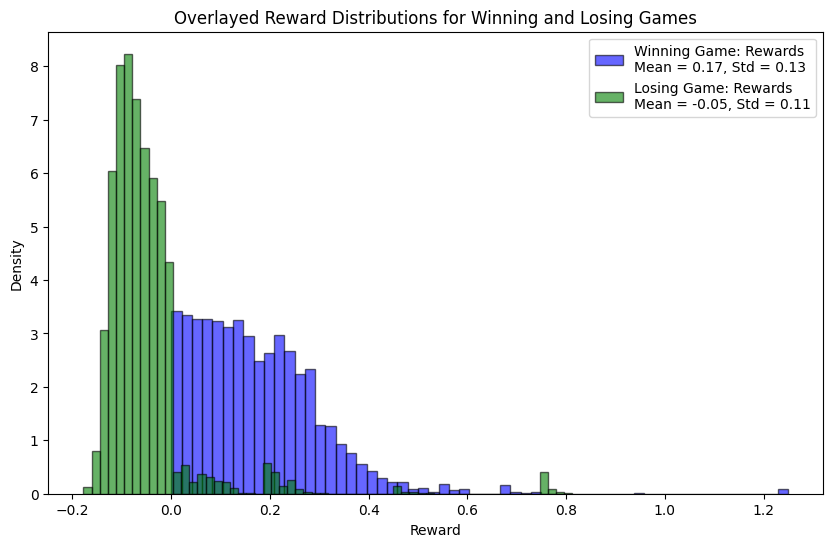

Winning Player - Mean Reward: 0.41, Standard Deviation: 0.24
Losing Player - Mean Reward: 0.44, Standard Deviation: 0.30


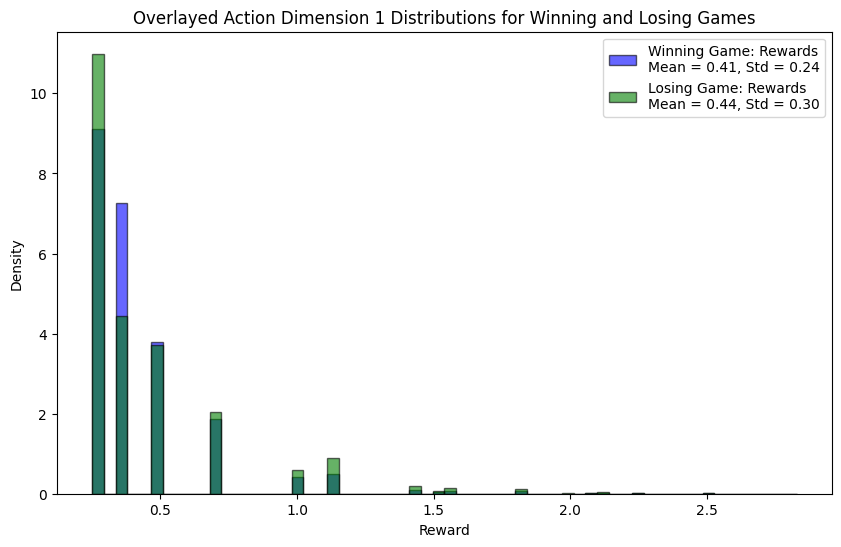

Winning Player - Mean Reward: 0.80, Standard Deviation: 0.55
Losing Player - Mean Reward: 1.05, Standard Deviation: 0.64


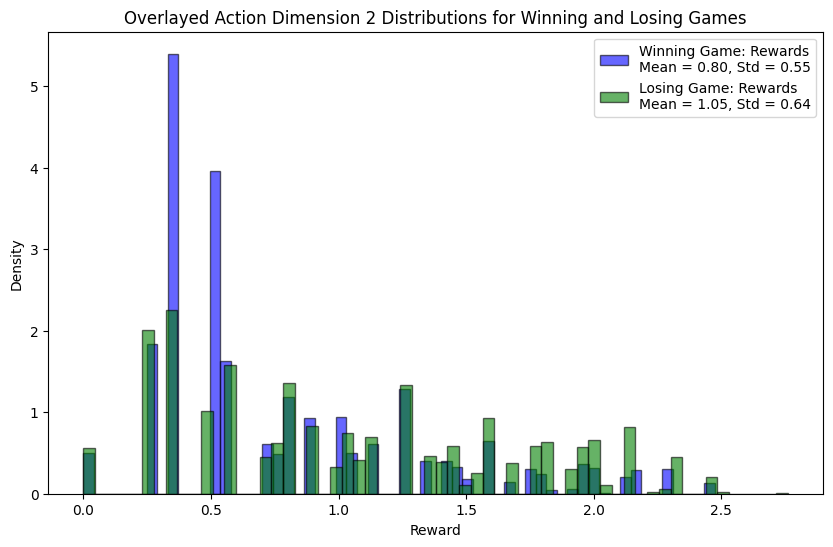

Winning Player - Mean Reward: 0.70, Standard Deviation: 0.45
Losing Player - Mean Reward: 0.95, Standard Deviation: 0.59


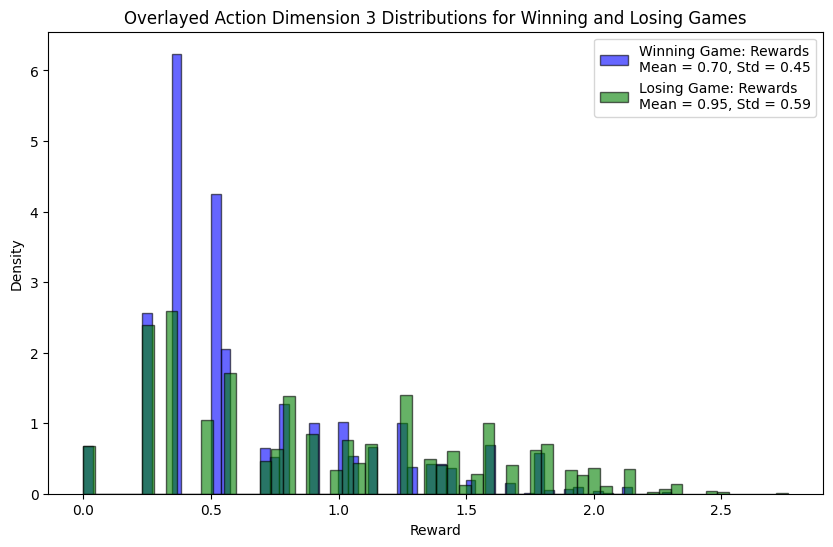

Winning Player - Mean Reward: 0.91, Standard Deviation: 1.22
Losing Player - Mean Reward: 0.84, Standard Deviation: 1.49


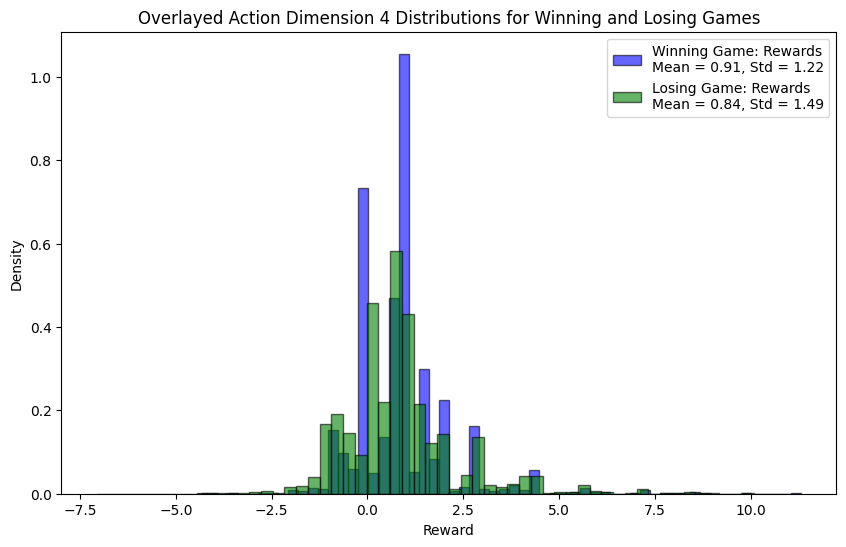

Winning Player - Mean Reward: 0.68, Standard Deviation: 0.59
Losing Player - Mean Reward: 1.04, Standard Deviation: 0.47


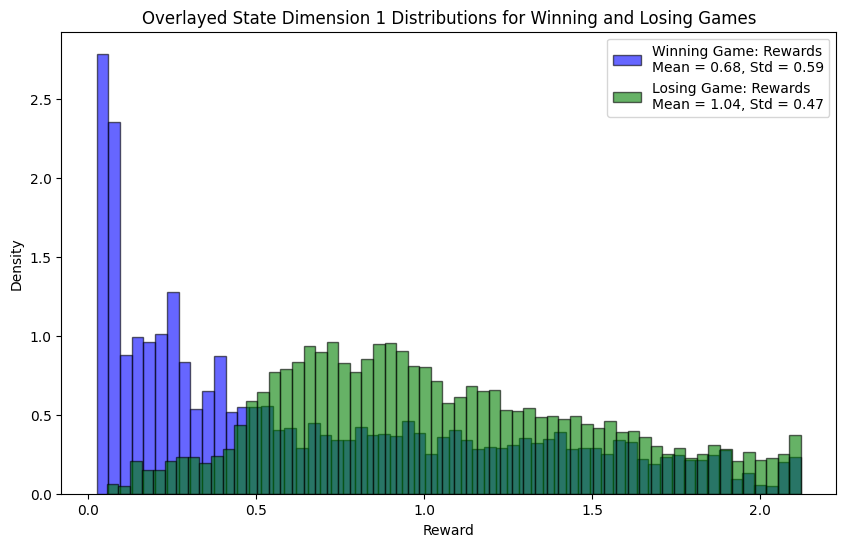

Winning Player - Mean Reward: 0.43, Standard Deviation: 0.06
Losing Player - Mean Reward: 0.41, Standard Deviation: 0.07


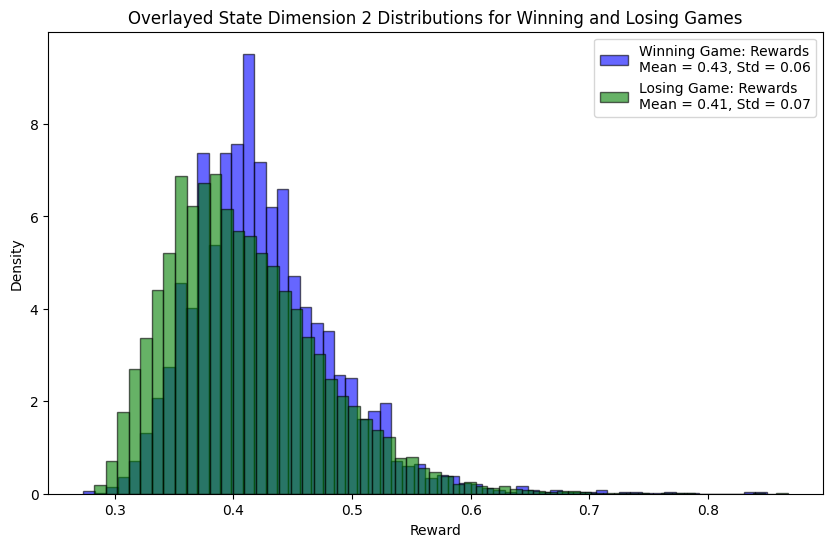

Winning Player - Mean Reward: 1.13, Standard Deviation: 0.34
Losing Player - Mean Reward: 1.23, Standard Deviation: 0.38


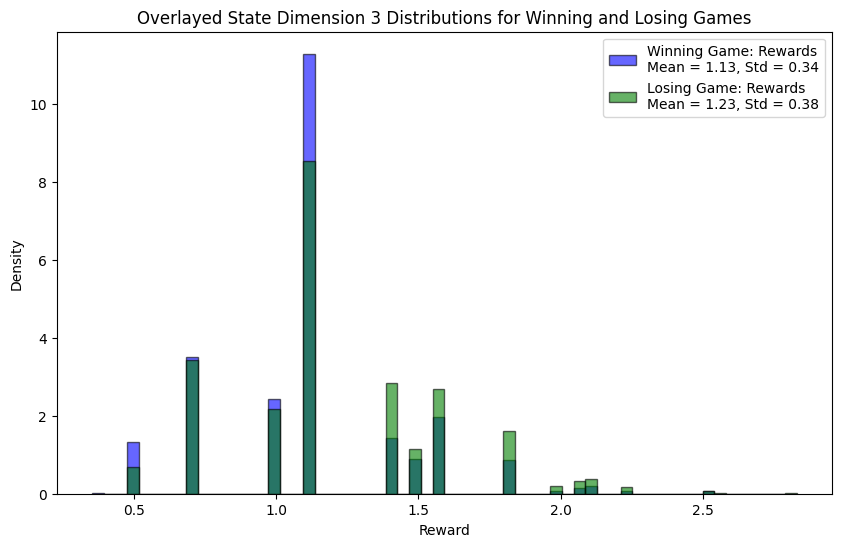

Winning Player - Mean Reward: 1.77, Standard Deviation: 0.67
Losing Player - Mean Reward: 2.17, Standard Deviation: 0.29


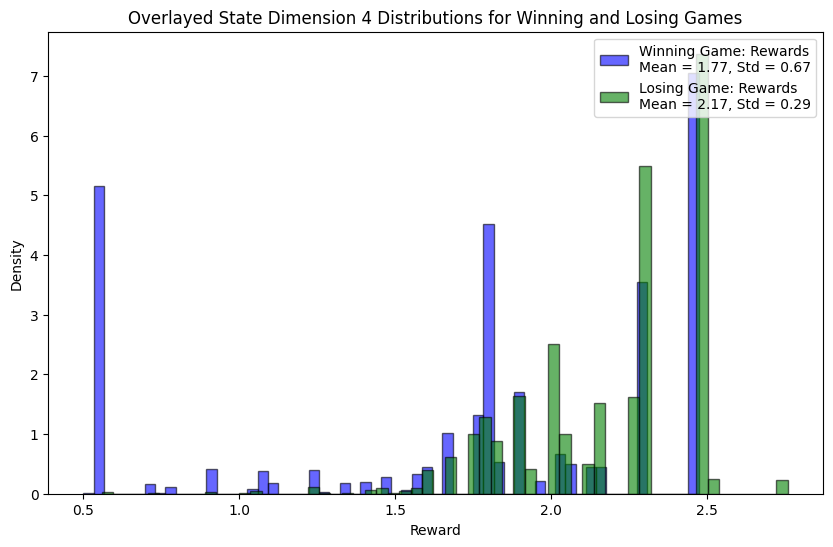

Winning Player - Mean Reward: 0.21, Standard Deviation: 0.37
Losing Player - Mean Reward: 0.34, Standard Deviation: 0.43


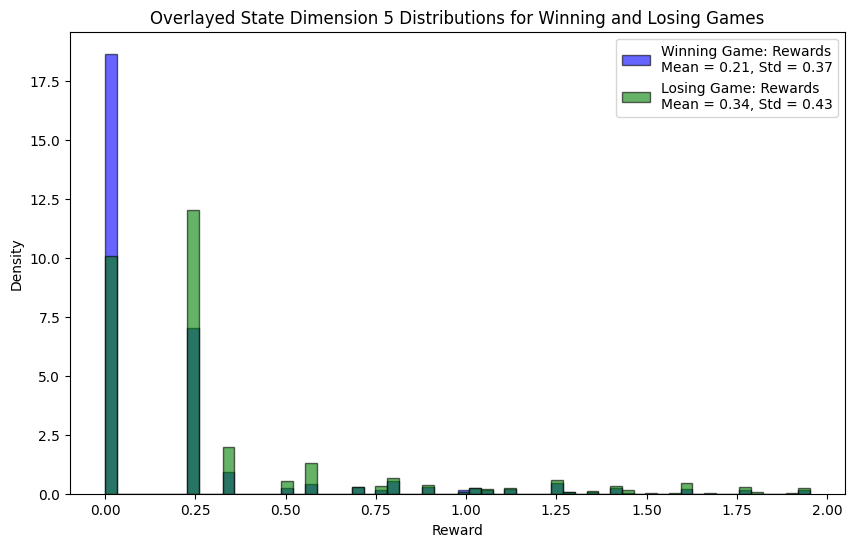

Winning Player - Mean Reward: 5.38, Standard Deviation: 3.25
Losing Player - Mean Reward: 2.92, Standard Deviation: 2.33


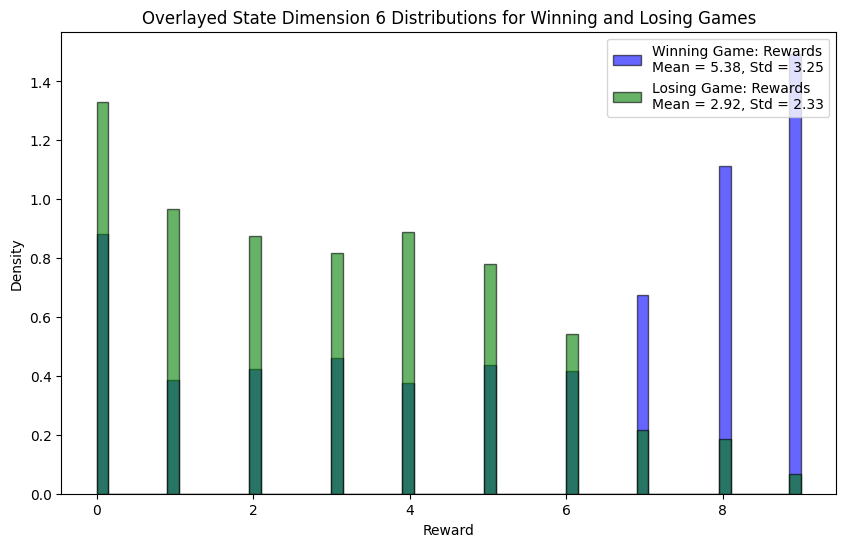

In [47]:
win_exps = [e for e in experiences if e.metadata.winning_player == "0"]
loss_exps = [e for e in experiences if e.metadata.winning_player == "3"]


plot_reward_distributions(
    [e.data.reward.item() for e in win_exps], 
    [e.data.reward.item() for e in loss_exps], 
    "Reward"
)

# Plotting action distributions by dimension
action_dims = experiences[0].data.action.shape[-1]
p0_actions = [[] for _ in range(action_dims)]
p3_actions = [[] for _ in range(action_dims)]

for e in experiences:
    if e.metadata.winning_player == "0":
        for i in range(action_dims):
            p0_actions[i].append(e.data.action[i].item())
    elif e.metadata.winning_player == "3":
        for i in range(action_dims):
            p3_actions[i].append(e.data.action[i].item())

# Plot normalized action distributions for each dimension
for i in range(action_dims):
    plot_reward_distributions(p0_actions[i], p3_actions[i], f"Action Dimension {i+1}")

# Plotting state distributions by dimension
state_dims = experiences[0].data.state.shape[-1]
p0_states = [[] for _ in range(state_dims)]
p3_states = [[] for _ in range(state_dims)]

for e in experiences:
    if e.metadata.winning_player == "0":
        for i in range(state_dims):
            p0_states[i].append(e.data.state[i].item())
    elif e.metadata.winning_player == "3":
        for i in range(state_dims):
            p3_states[i].append(e.data.state[i].item())

# Plot normalized state distributions for each dimension
for i in range(state_dims):
    plot_reward_distributions(p0_states[i], p3_states[i], f"State Dimension {i+1}")

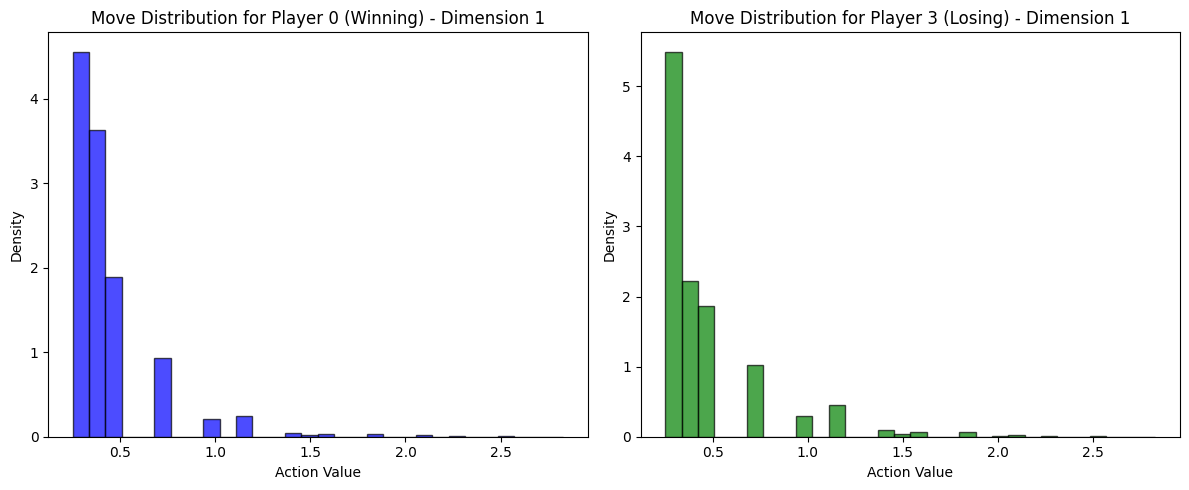

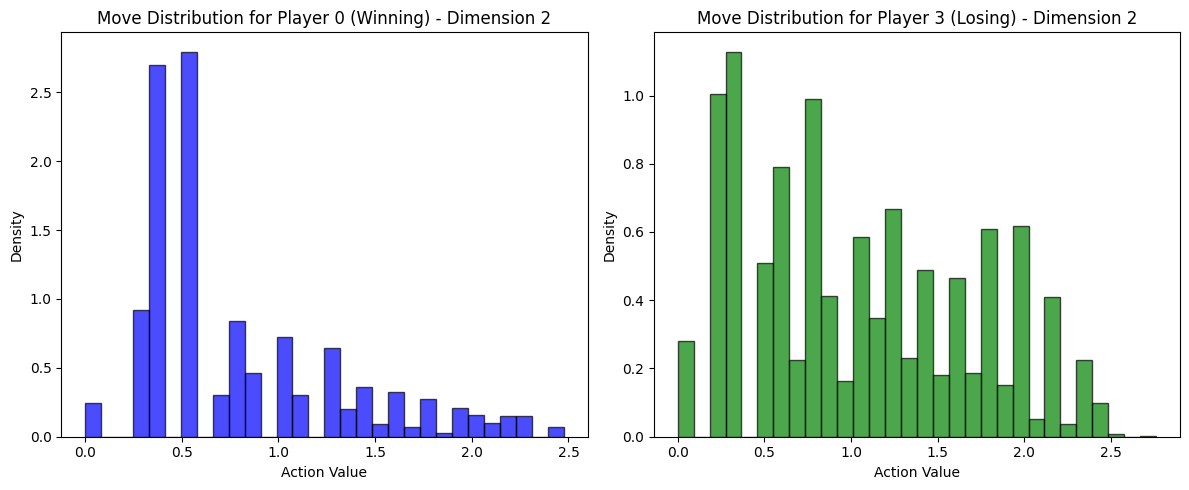

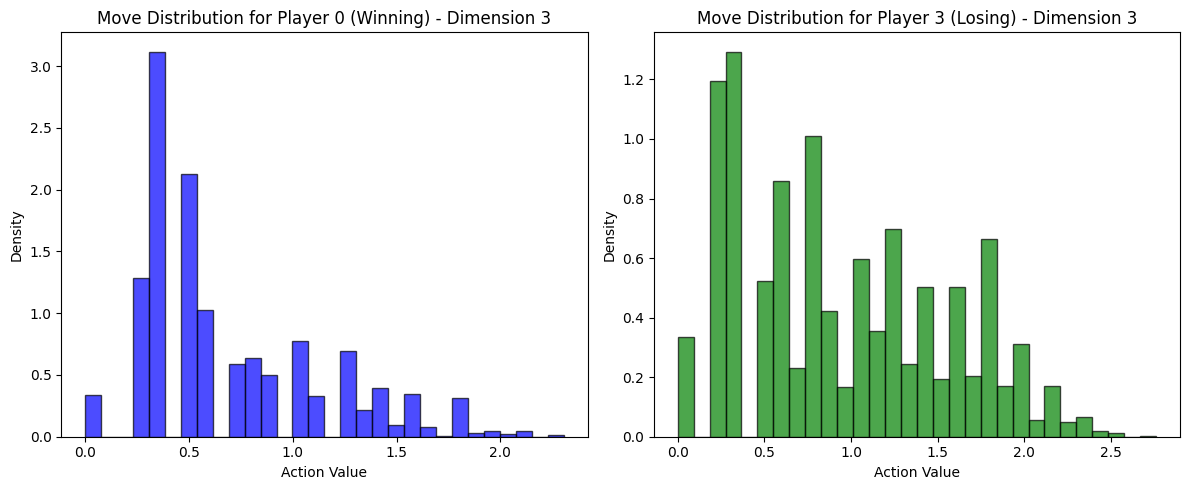

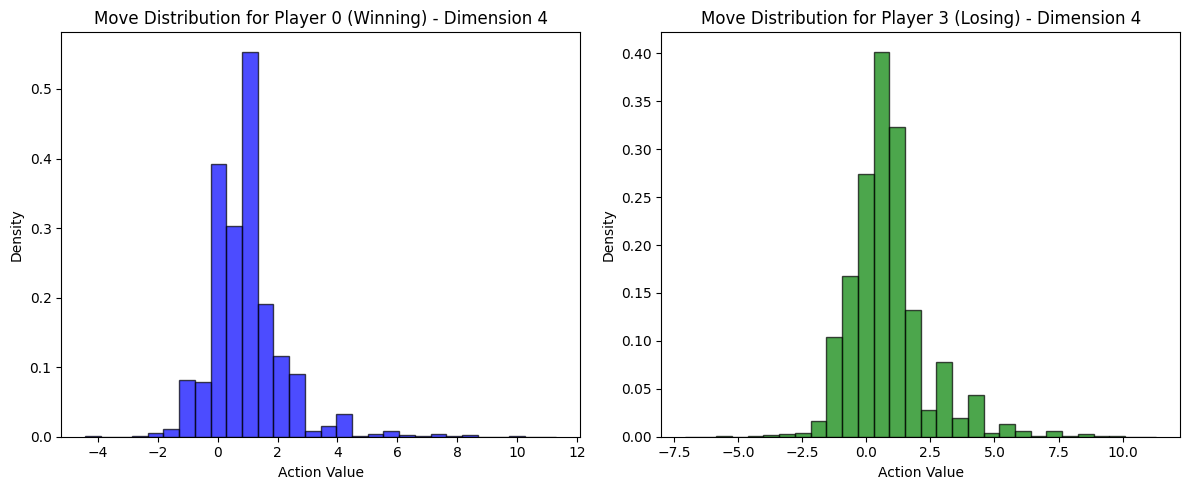

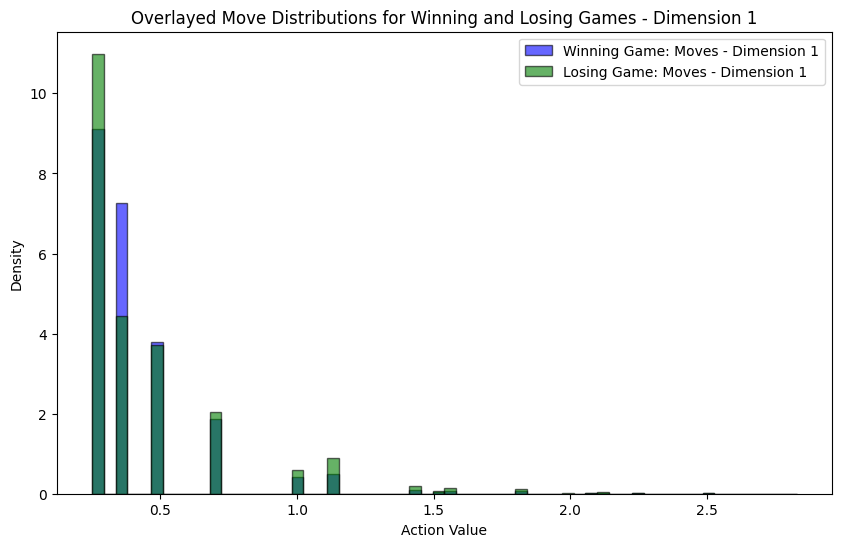

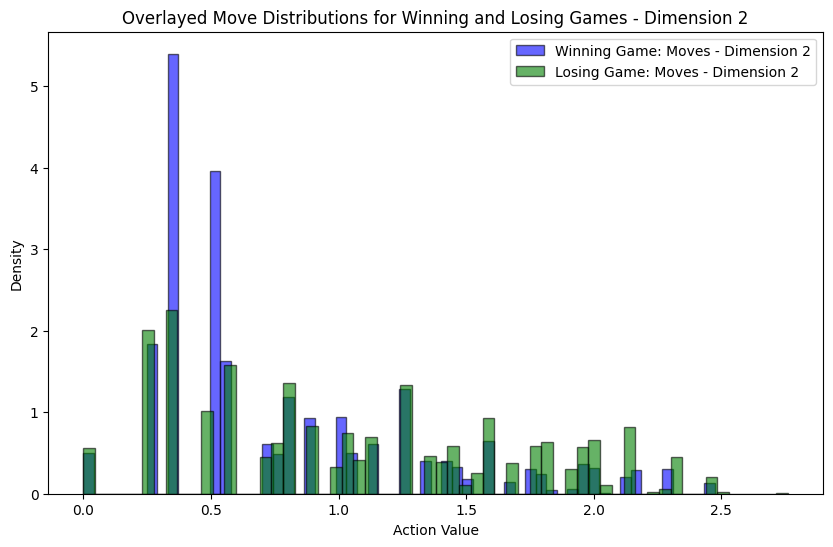

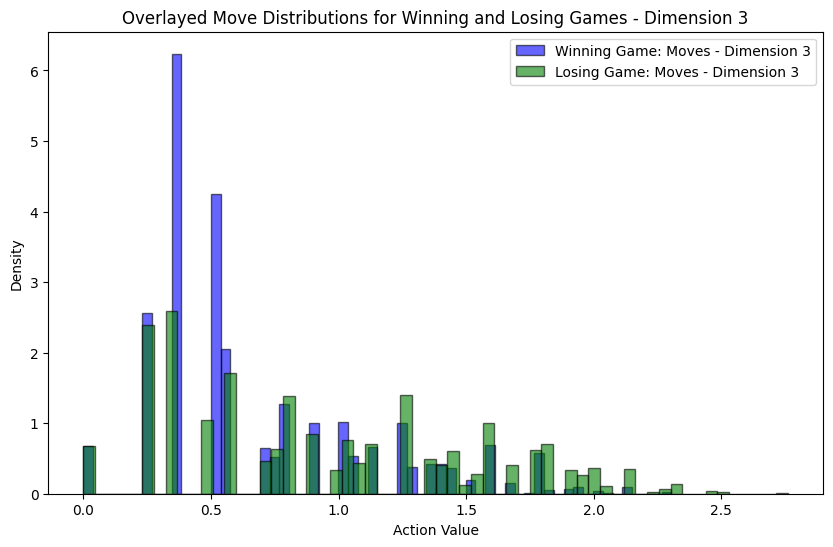

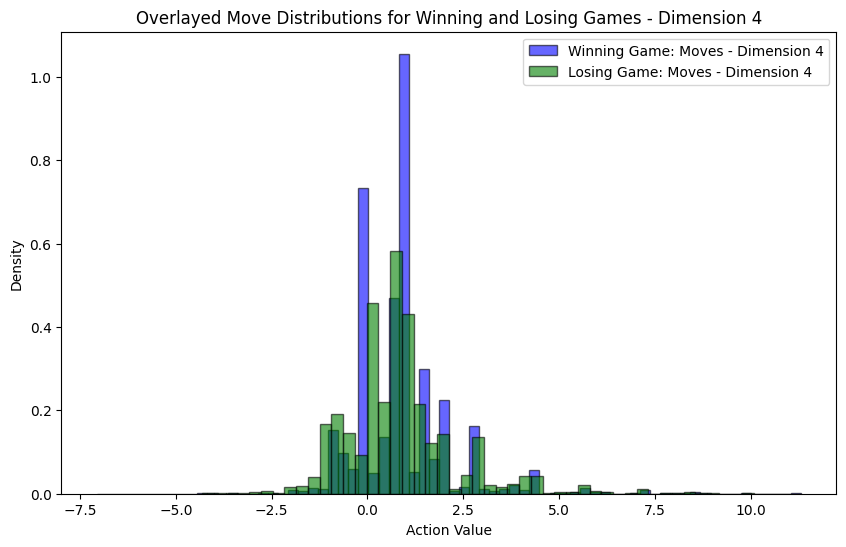

In [36]:
import matplotlib.pyplot as plt

# Determine the number of dimensions in the action tensor
action_dims = experiences[0].data.action.shape[-1]

# Extract rewards for each dimension and player group
p0_actions = [[] for _ in range(action_dims)]
p3_actions = [[] for _ in range(action_dims)]

# Populate action lists for each dimension
for e in experiences:
    if e.metadata.winning_player == "0":
        for i in range(action_dims):
            p0_actions[i].append(e.data.action[i].item())
    elif e.metadata.winning_player == "3":
        for i in range(action_dims):
            p3_actions[i].append(e.data.action[i].item())

# Plot normalized distributions for each dimension separately
for i in range(action_dims):
    plot_reward_distributions(win_rewards, loss_rewards, "8794")


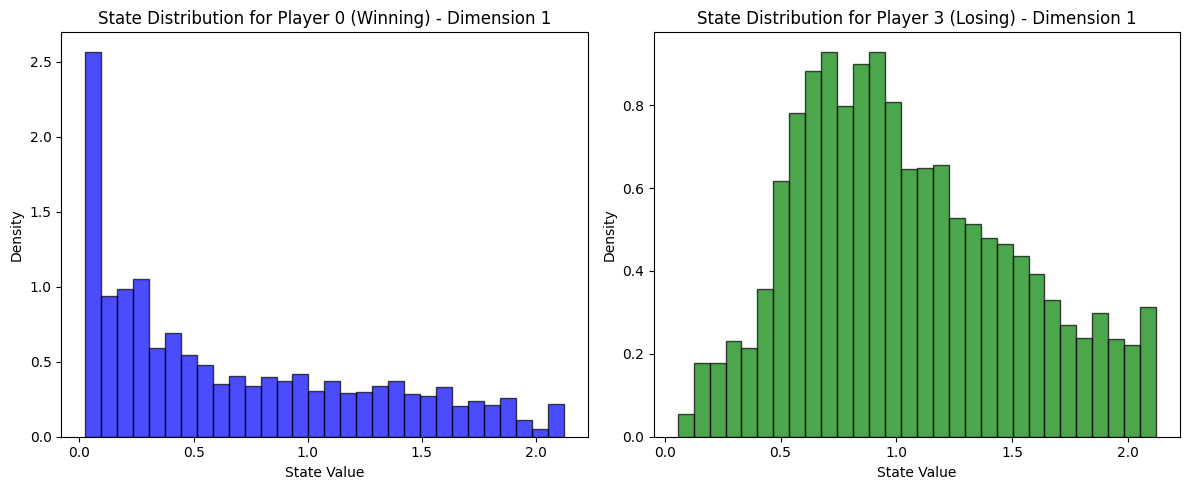

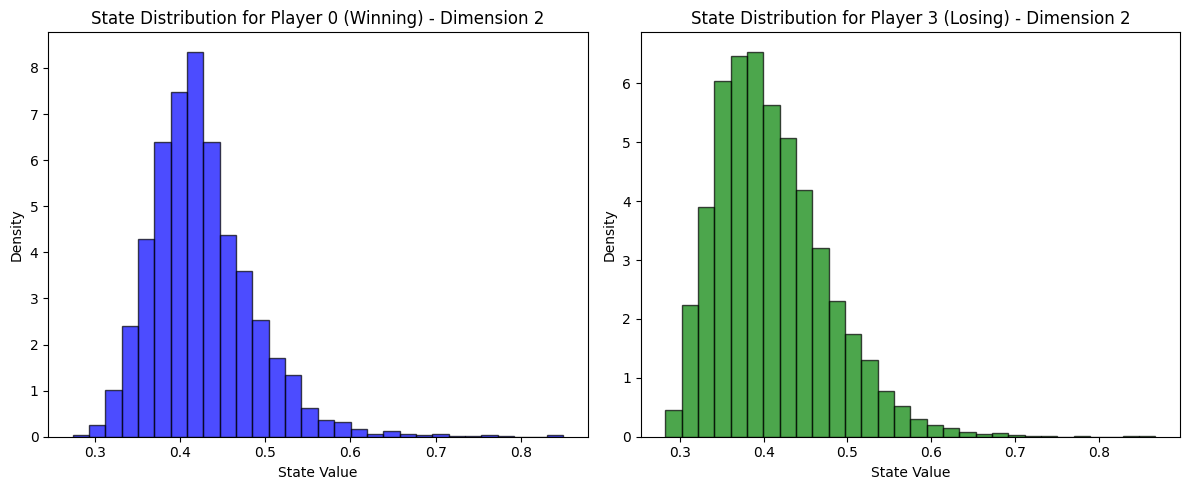

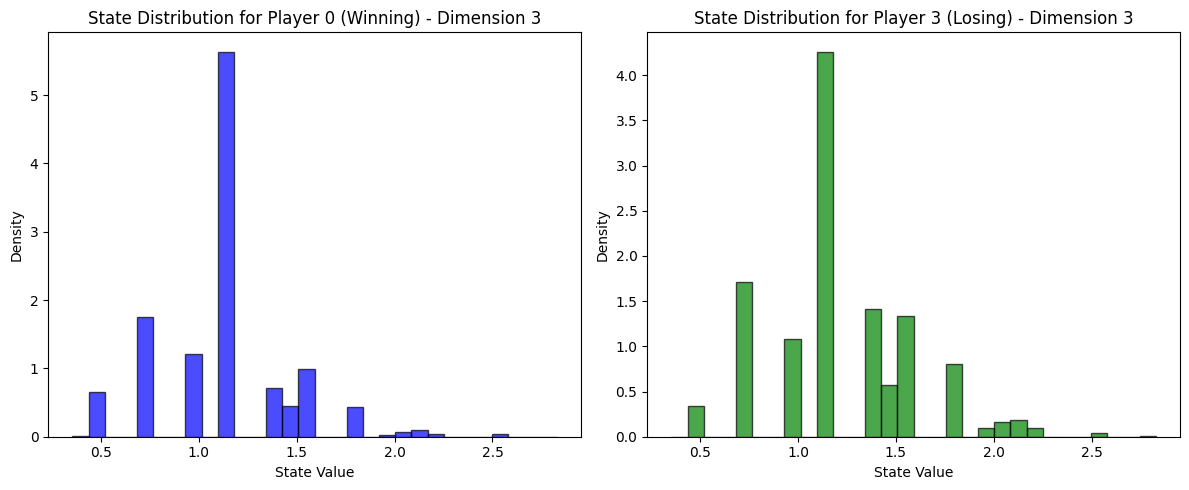

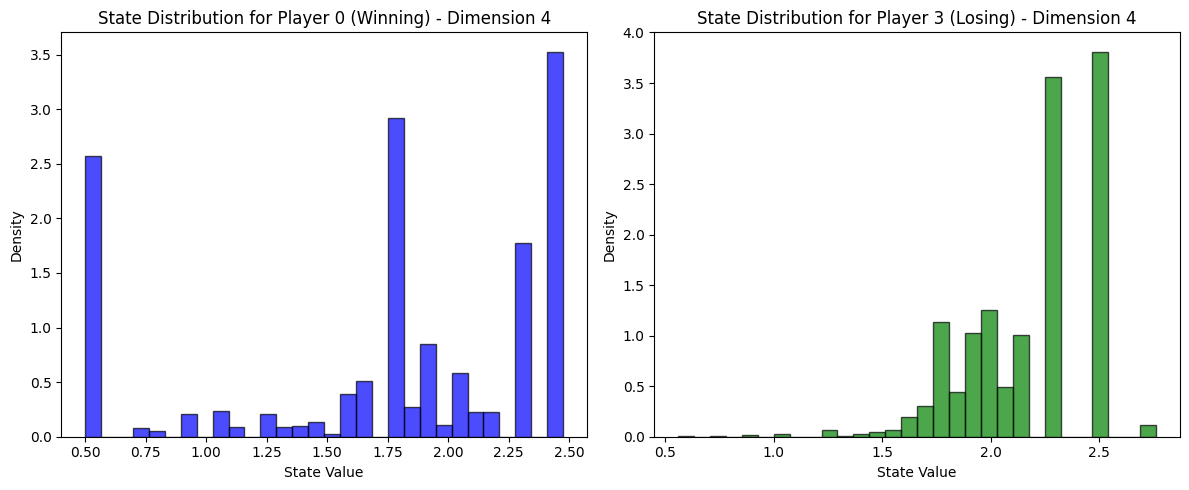

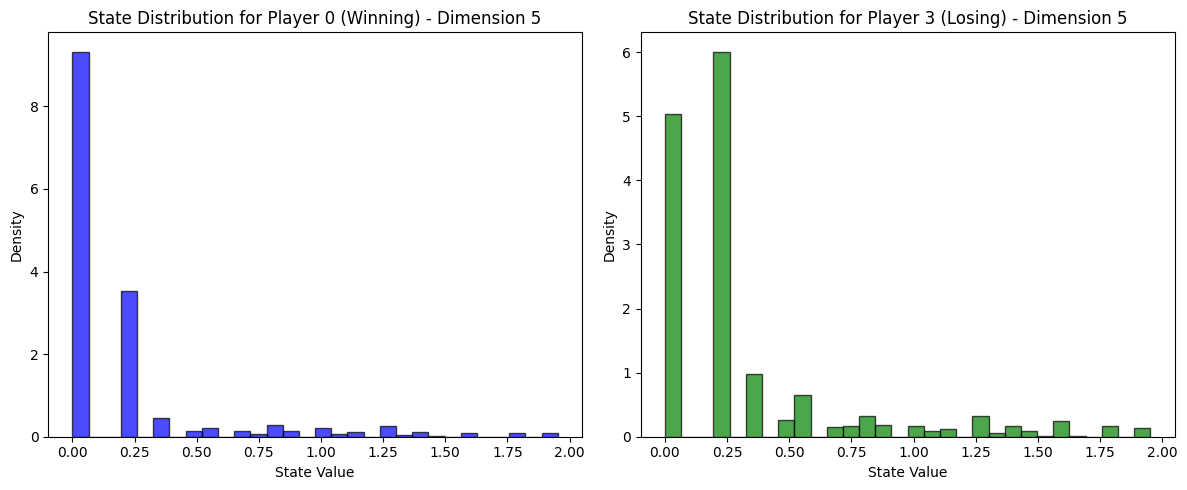

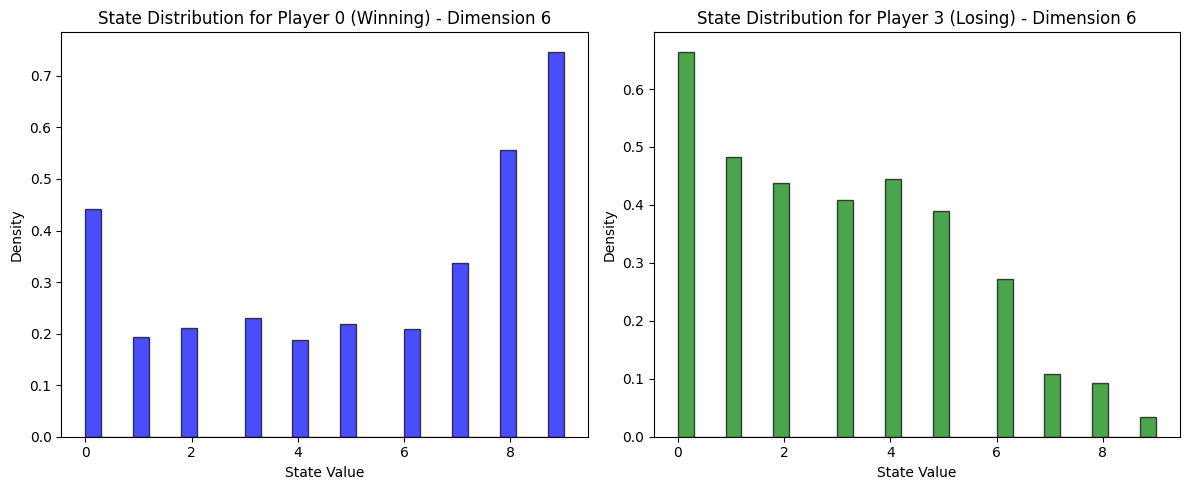

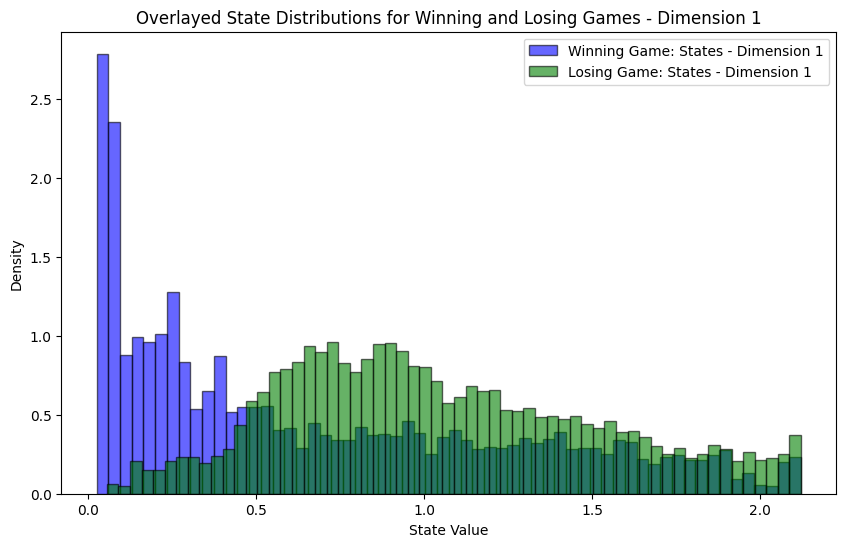

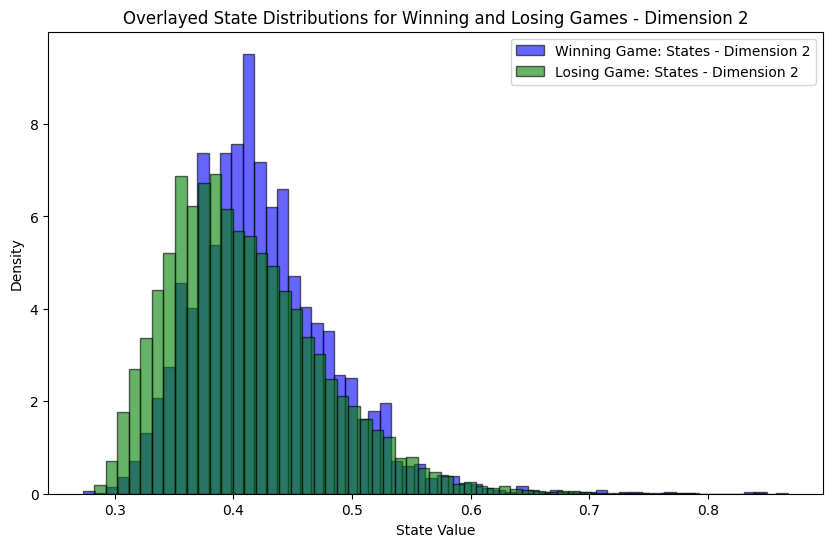

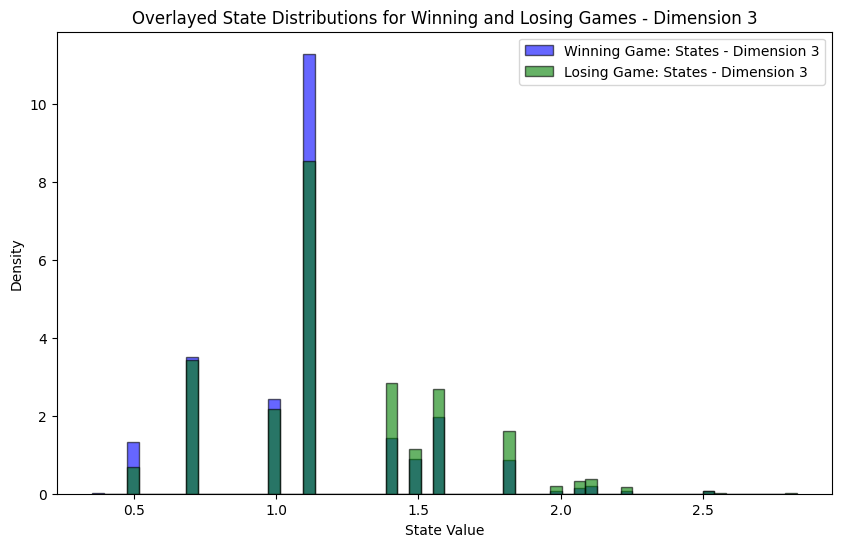

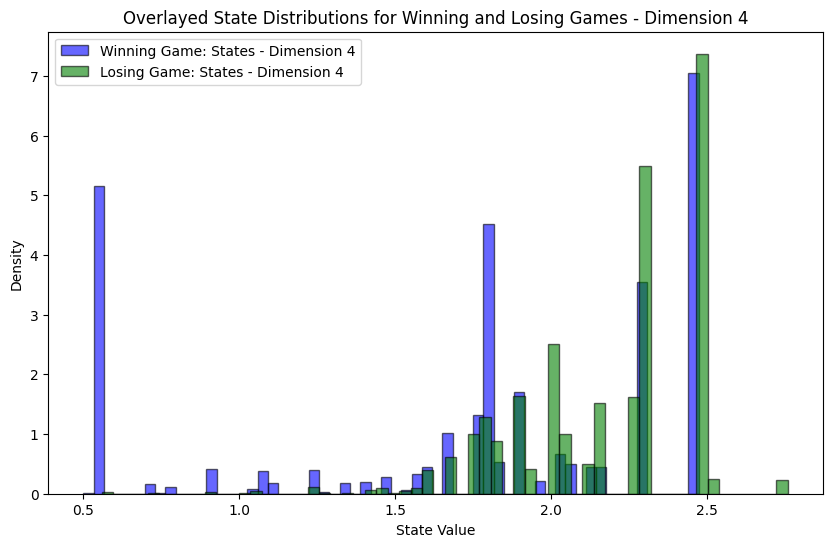

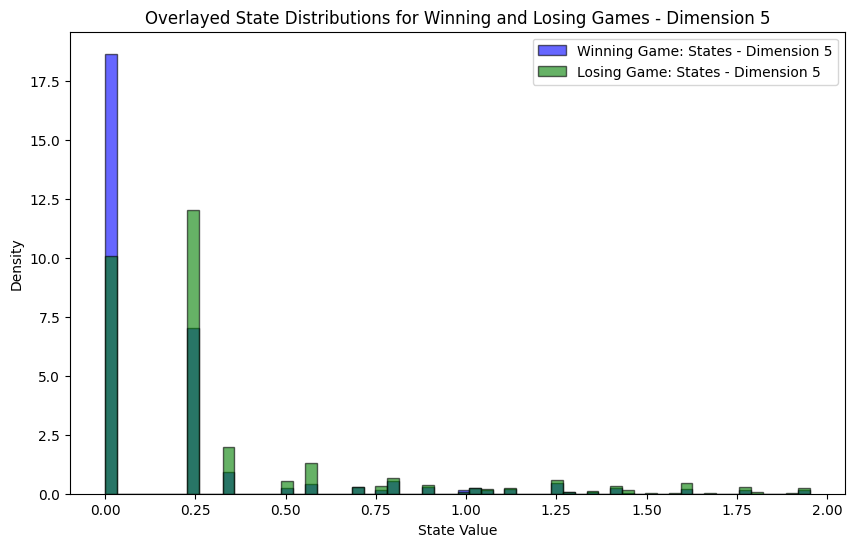

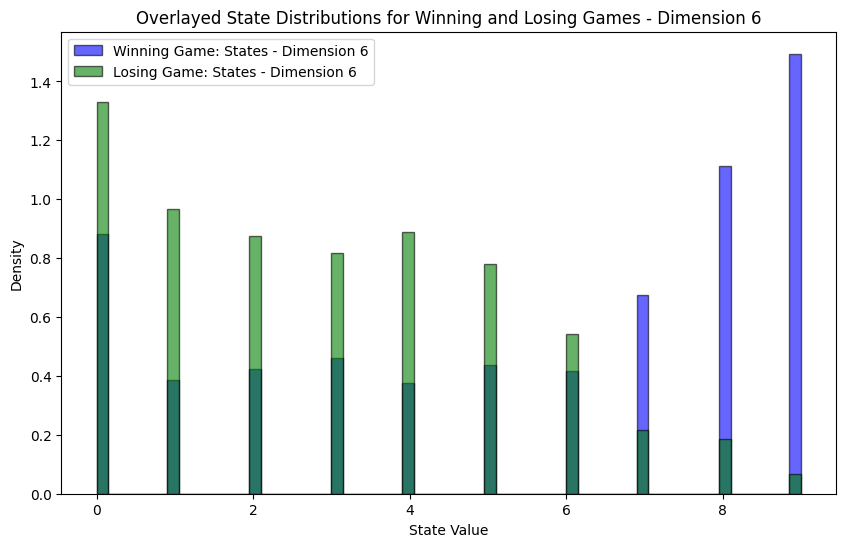

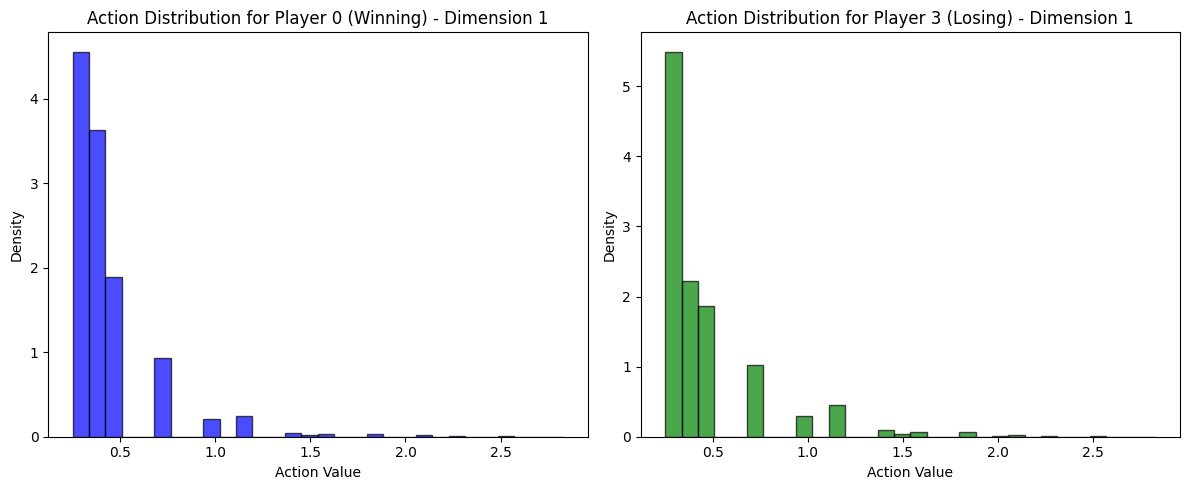

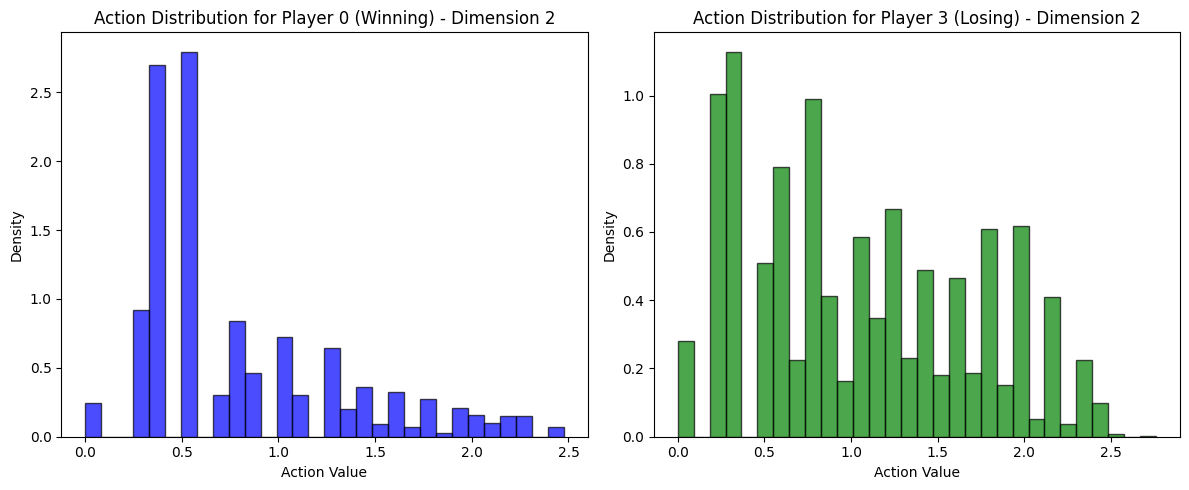

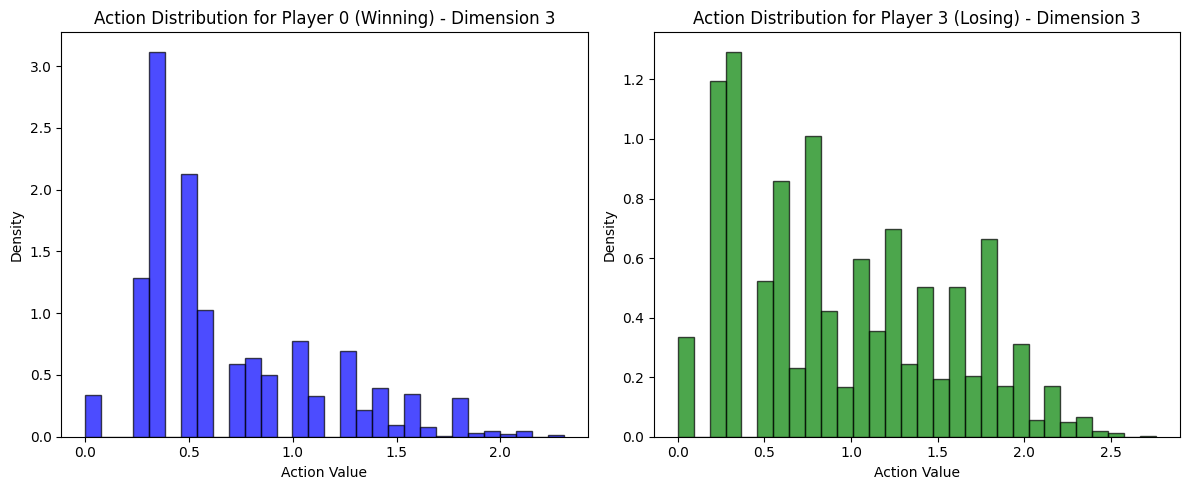

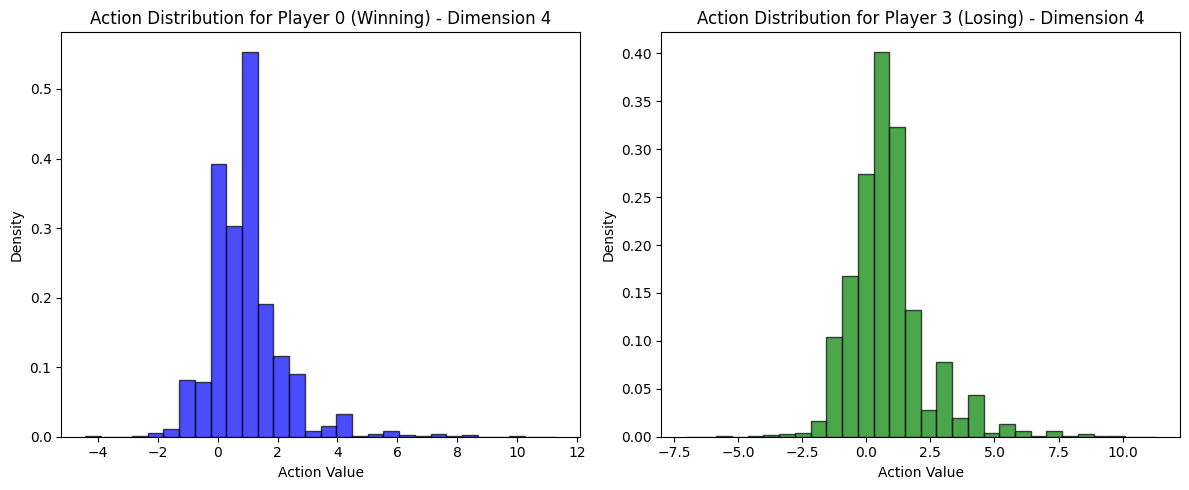

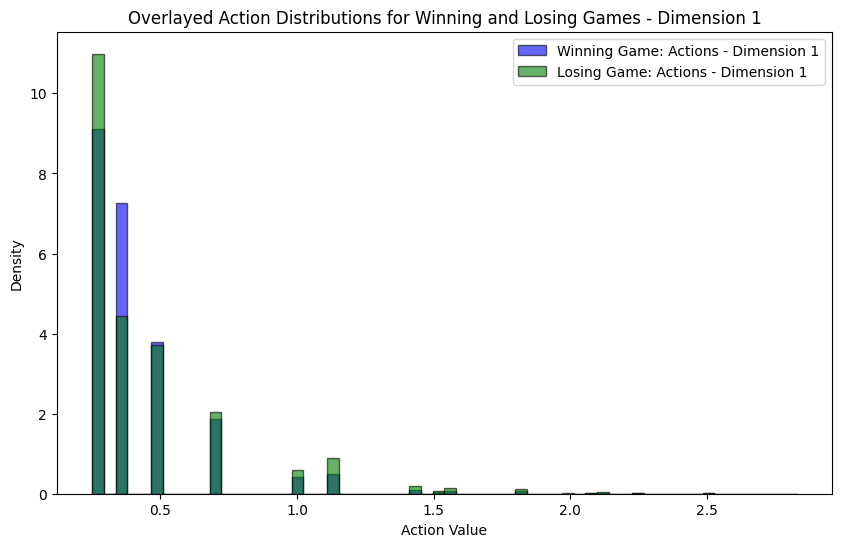

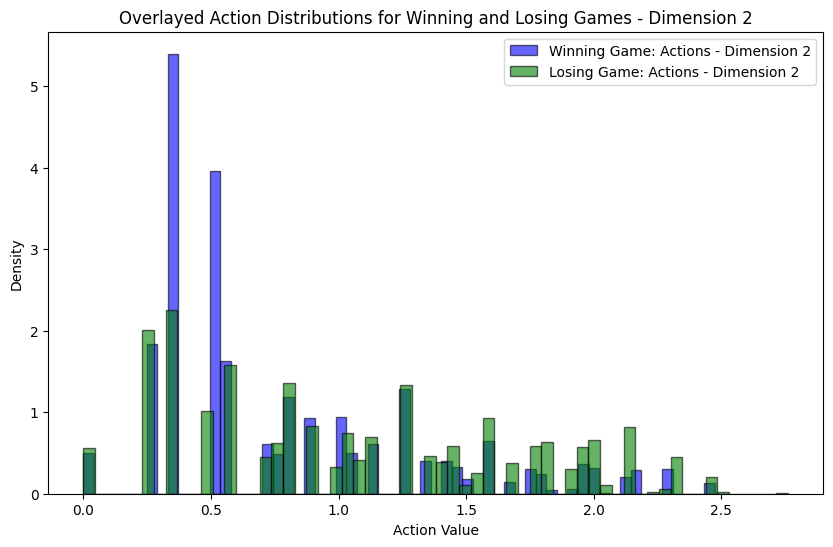

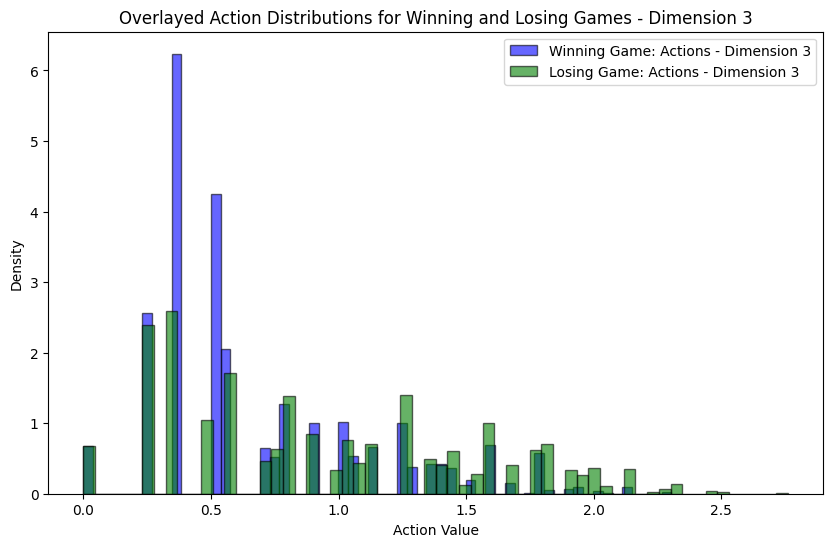

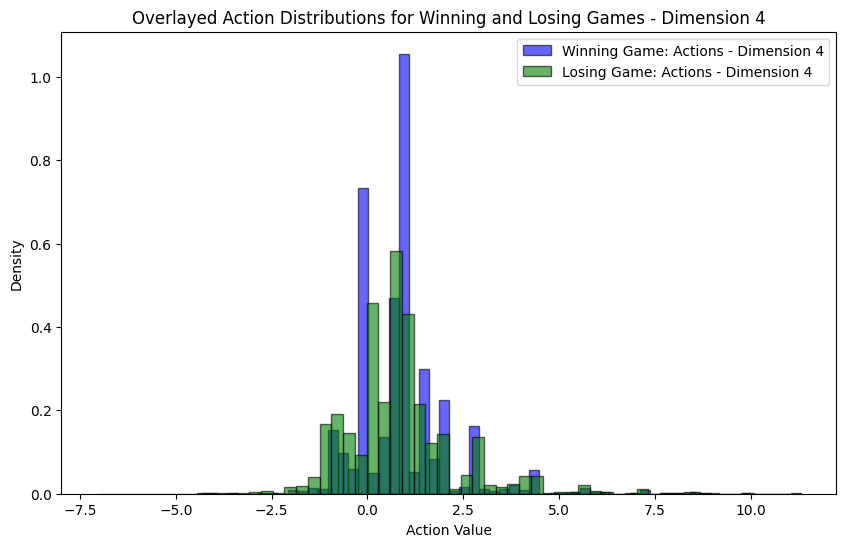

In [37]:
import matplotlib.pyplot as plt

# Determine the number of dimensions in the state and action tensors
state_dims = experiences[0].data.state.shape[-1]
action_dims = experiences[0].data.action.shape[-1]

# Extract state and action values for each dimension and player group
p0_states = [[] for _ in range(state_dims)]
p3_states = [[] for _ in range(state_dims)]
p0_actions = [[] for _ in range(action_dims)]
p3_actions = [[] for _ in range(action_dims)]

# Populate state and action lists for each dimension
for e in experiences:
    if e.metadata.winning_player == "0":
        for i in range(state_dims):
            p0_states[i].append(e.data.state[i].item())
        for j in range(action_dims):
            p0_actions[j].append(e.data.action[j].item())
    elif e.metadata.winning_player == "3":
        for i in range(state_dims):
            p3_states[i].append(e.data.state[i].item())
        for j in range(action_dims):
            p3_actions[j].append(e.data.action[j].item())

# Plot state distributions for each dimension separately (normalized)
for i in range(state_dims):
    plt.figure(figsize=(12, 5))

    # Player 0 state distribution for dimension i
    plt.subplot(1, 2, 1)
    plt.hist(p0_states[i], bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
    plt.title(f"State Distribution for Player 0 (Winning) - Dimension {i+1}")
    plt.xlabel("State Value")
    plt.ylabel("Density")

    # Player 3 state distribution for dimension i
    plt.subplot(1, 2, 2)
    plt.hist(p3_states[i], bins=30, alpha=0.7, color='green', edgecolor='black', density=True)
    plt.title(f"State Distribution for Player 3 (Losing) - Dimension {i+1}")
    plt.xlabel("State Value")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

# Overlay state distributions for each dimension (normalized)
for i in range(state_dims):
    plt.figure(figsize=(10, 6))
    plt.hist(p0_states[i], bins=60, alpha=0.6, color='blue', edgecolor='black', density=True, label=f"Winning Game: States - Dimension {i+1}")
    plt.hist(p3_states[i], bins=60, alpha=0.6, color='green', edgecolor='black', density=True, label=f"Losing Game: States - Dimension {i+1}")

    plt.title(f"Overlayed State Distributions for Winning and Losing Games - Dimension {i+1}")
    plt.xlabel("State Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Plot action distributions for each dimension separately (normalized)
for j in range(action_dims):
    plt.figure(figsize=(12, 5))

    # Player 0 action distribution for dimension j
    plt.subplot(1, 2, 1)
    plt.hist(p0_actions[j], bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
    plt.title(f"Action Distribution for Player 0 (Winning) - Dimension {j+1}")
    plt.xlabel("Action Value")
    plt.ylabel("Density")

    # Player 3 action distribution for dimension j
    plt.subplot(1, 2, 2)
    plt.hist(p3_actions[j], bins=30, alpha=0.7, color='green', edgecolor='black', density=True)
    plt.title(f"Action Distribution for Player 3 (Losing) - Dimension {j+1}")
    plt.xlabel("Action Value")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

# Overlay action distributions for each dimension (normalized)
for j in range(action_dims):
    plt.figure(figsize=(10, 6))
    plt.hist(p0_actions[j], bins=60, alpha=0.6, color='blue', edgecolor='black', density=True, label=f"Winning Game: Actions - Dimension {j+1}")
    plt.hist(p3_actions[j], bins=60, alpha=0.6, color='green', edgecolor='black', density=True, label=f"Losing Game: Actions - Dimension {j+1}")

    plt.title(f"Overlayed Action Distributions for Winning and Losing Games - Dimension {j+1}")
    plt.xlabel("Action Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
